# **Diabetes Prediction Using Logistic Regression**

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

## **Importing Dataset**

In [31]:
data = pd.read_csv ("/content/breast_cancer(1).csv")

## **Creating DataFrame**

In [32]:
df = pd.DataFrame (data)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## **Data shape and information**

In [6]:
print ("Shape of data {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data (768, 9)
Number of rows: 768
Number of columns: 9


In [7]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **Checking for missing values**

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Selecting features**

In [12]:
X = pd.DataFrame (data , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]) # Features

y = data.Outcome # Target variables

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

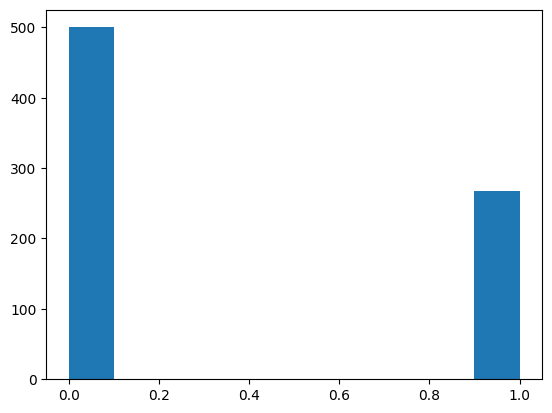

In [13]:
plt.hist (y)

In [16]:
((y == 0).sum ()/len (y)) * 100

65.10416666666666

## **Split X and y into training and testing sets**

In [17]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

## **Training**

In [18]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)                     # Fitting a  model

LogisticRegression(solver='liblinear')

## **Predicting**

In [19]:
y_pred = logreg.predict(X_test)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(X_test)   # Predicted probabilities from test features

In [20]:
print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))

Accuracy:  0.8072916666666666


In [21]:
logreg.intercept_

array([-5.45413386])

In [22]:
logreg.coef_

array([[ 8.34612481e-02,  2.55666050e-02, -1.64871716e-02,
         5.59519421e-03, -5.38278319e-04,  5.43371349e-02,
         6.01706344e-01,  1.23641482e-02]])

### **Prediction probability**

In [23]:
logreg.predict_proba(X)

array([[0.34063817, 0.65936183],
       [0.88929387, 0.11070613],
       [0.28840965, 0.71159035],
       ...,
       [0.7539826 , 0.2460174 ],
       [0.67081035, 0.32918965],
       [0.86387653, 0.13612347]])

### **Class prediction**

In [24]:
logreg.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

### **Score**

In [25]:
logreg.score(X,y)

0.76953125

## **Confusion Matrix**

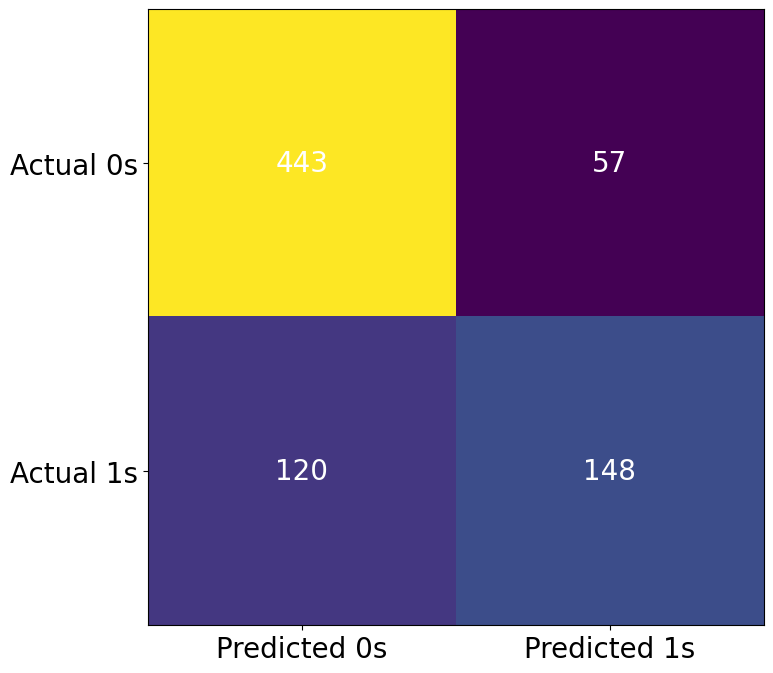

In [26]:
cm = confusion_matrix (y , logreg.predict(X))

fig , ax = plt.subplots (figsize = (8,8))
ax.imshow (cm)
ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual 0s" , "Actual 1s"))

ax.tick_params(axis='both', which='major', labelsize=20)
#ax.tick_params(axis='both', which='minor', labelsize=20)
#plt.xticks(fontsize=14, rotation=90)

ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="white", fontsize = 20 )
plt.show()

## **Classification Report**

In [27]:
print (classification_report (y , logreg.predict (X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



## **Inference**

In [29]:
prueba = pd.DataFrame ({"Pregnancies" : [1] , "Glucose" :[120] , "BloodPressure" :[80] ,"SkinThickness" : [0] ,
                    "Insulin" : [0] , "BMI" : [23] , "DiabetesPedigreeFunction" : [0.5] ,
                    "Age" : [30]})
prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,120,80,0,0,23,0.5,30


In [30]:
prediccion = logreg.predict(prueba)
prediccion

if(prediccion[0]==0):
  print("Diagnóstico: sano")
elif(prediccion[0]==1):
  print("Diagnóstico: diabetes")
else:
  print("Error de predicción")


Diagnóstico: sano
